## DATA PREPROCESSING ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Masking
from sklearn.metrics import mean_absolute_error
from scipy.interpolate import UnivariateSpline
import keras

In [95]:
dff4 = pd.read_csv('02_15mins.csv')

In [96]:
dff4 

,datetime,Timestamp,PM2_5.ug.m3.,PM10.ug.m3.,PM1.ug.m3.,Temperature.C.,Humidity..RH.,CO2.ppm.
0,2024-06-27 15:45:00,1.719504e+09,2.0,2.1,1.0,24.5,76.0,799.4
1,2024-06-27 16:00:00,1.719504e+09,2.0,2.0,1.0,24.7,75.0,823.1
2,2024-06-27 16:15:00,1.719505e+09,2.0,2.0,1.0,24.7,72.8,835.1
3,2024-06-27 16:30:00,1.719506e+09,1.7,1.8,0.7,24.8,72.0,850.2
4,2024-06-27 16:45:00,1.719507e+09,1.6,1.6,0.6,24.8,71.0,858.2
...,...,...,...,...,...,...,...,...
17565,2024-12-27 15:00:00,1.735312e+09,23.6,26.1,18.6,24.8,56.0,608.4
17566,2024-12-27 15:15:00,1.735313e+09,23.3,25.3,18.3,24.8,56.0,587.0
17567,2024-12-27 15:30:00,1.735314e+09,22.5,24.7,17.6,24.8,55.8,585.6
17568,2024-12-27 15:45:00,1.735315e+09,21.7,23.9,17.3,24.8,56.0,610.3


In [ ]:
df2 = pd.read_csv('02_30mins(new).csv', parse_dates=["datetime"], index_col="datetime")
df4 = pd.read_csv('04_30mins(new).csv', parse_dates=["datetime"], index_col="datetime")

In [27]:
df2_1 = pd.read_csv('02_15mins.csv', parse_dates=["datetime"], index_col="datetime")
df4_1 = pd.read_csv('04_15mins.csv', parse_dates=["datetime"], index_col="datetime")

In [28]:
df2_1 = df2_1.drop(columns=['Outdoor.AQI.US.', 'AQI.US.', 'AQI.CN.', 'Outdoor.AQI.CN.', 'Temperature.F.'])
df2_1.to_csv('02_15mins.csv')

In [29]:
df2_1

,Timestamp,PM2_5.ug.m3.,PM10.ug.m3.,PM1.ug.m3.,Temperature.C.,Humidity..RH.,CO2.ppm.
datetime,,,,,,,
2024-06-27 15:45:00,1.719504e+09,2.0,2.1,1.0,24.5,76.0,799.4
2024-06-27 16:00:00,1.719504e+09,2.0,2.0,1.0,24.7,75.0,823.1
2024-06-27 16:15:00,1.719505e+09,2.0,2.0,1.0,24.7,72.8,835.1
2024-06-27 16:30:00,1.719506e+09,1.7,1.8,0.7,24.8,72.0,850.2
2024-06-27 16:45:00,1.719507e+09,1.6,1.6,0.6,24.8,71.0,858.2
...,...,...,...,...,...,...,...
2024-12-27 15:00:00,1.735312e+09,23.6,26.1,18.6,24.8,56.0,608.4
2024-12-27 15:15:00,1.735313e+09,23.3,25.3,18.3,24.8,56.0,587.0
2024-12-27 15:30:00,1.735314e+09,22.5,24.7,17.6,24.8,55.8,585.6


In [30]:
df4_1 = df4_1.drop(columns=['Outdoor.AQI.US.', 'AQI.US.', 'AQI.CN.', 'Outdoor.AQI.CN.', 'Temperature.F.'])
df4_1.to_csv('04_15mins.csv')

In [31]:
df4_1

,Timestamp,PM2_5.ug.m3.,PM10.ug.m3.,PM1.ug.m3.,Temperature.C.,Humidity..RH.,CO2.ppm.
datetime,,,,,,,
2024-06-27 15:45:00,1.719504e+09,1.6,1.6,0.6,24.7,74.6,928.3
2024-06-27 16:00:00,1.719504e+09,1.5,1.5,0.5,25.1,73.2,955.4
2024-06-27 16:15:00,1.719505e+09,1.5,1.5,0.5,25.2,71.1,960.1
2024-06-27 16:30:00,1.719506e+09,1.2,1.2,0.2,25.1,70.9,964.9
2024-06-27 16:45:00,1.719507e+09,1.4,1.4,0.4,25.2,68.1,966.6
...,...,...,...,...,...,...,...
2024-12-27 15:00:00,1.735312e+09,29.2,32.2,26.4,25.0,55.0,601.6
2024-12-27 15:15:00,1.735313e+09,28.8,31.3,26.0,25.0,55.0,579.6
2024-12-27 15:30:00,1.735314e+09,27.8,30.2,24.8,25.0,55.0,577.9


In [ ]:
df2 = df2.drop(columns=['Outdoor.AQI.US.', 'AQI.US.', 'AQI.CN.', 'Outdoor.AQI.CN.', 'Temperature.F.'])
df2.to_csv('02_30mins(new).csv')

In [26]:
df2

,Timestamp,PM2_5.ug.m3.,PM10.ug.m3.,PM1.ug.m3.,Temperature.C.,Humidity..RH.,CO2.ppm.
datetime,,,,,,,
2024-06-27 15:30:00,1.719504e+09,2.00,2.10,1.00,24.50,76.0,799.40
2024-06-27 16:00:00,1.719505e+09,2.00,2.00,1.00,24.70,73.9,829.10
2024-06-27 16:30:00,1.719507e+09,1.65,1.70,0.65,24.80,71.5,854.20
2024-06-27 17:00:00,1.719508e+09,2.00,2.10,1.00,24.25,70.9,865.80
2024-06-27 17:30:00,1.719510e+09,2.00,2.00,0.30,24.05,72.6,801.40
...,...,...,...,...,...,...,...
2024-12-27 14:00:00,1.735309e+09,24.75,27.05,19.75,24.70,56.0,569.95
2024-12-27 14:30:00,1.735311e+09,24.05,26.40,19.05,24.75,56.0,601.65
2024-12-27 15:00:00,1.735312e+09,23.45,25.70,18.45,24.80,56.0,597.70


In [24]:
df4 = df4.drop(columns=['Outdoor.AQI.US.', 'AQI.US.', 'AQI.CN.', 'Outdoor.AQI.CN.', 'Temperature.F.'])
df4.to_csv('04_30mins(new).csv')

In [ ]:
# Kiểm tra lại kiến trúc của bộ data sensor 2
print("DataFrame info:")
print(df2.info())
print("\nFirst few rows:")
print(df2.head())
print("\nColumn names:", df2.columns.tolist())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8036 entries, 2024-06-27 15:30:00 to 2024-12-27 16:00:00
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8036 non-null   float64
 1   PM2_5.ug.m3.     8036 non-null   float64
 2   AQI.US.          8036 non-null   float64
 3   AQI.CN.          8036 non-null   float64
 4   PM10.ug.m3.      8036 non-null   float64
 5   PM1.ug.m3.       8036 non-null   float64
 6   Outdoor.AQI.US.  8036 non-null   float64
 7   Outdoor.AQI.CN.  8036 non-null   float64
 8   Temperature.C.   8036 non-null   float64
 9   Temperature.F.   8036 non-null   float64
 10  Humidity..RH.    8036 non-null   float64
 11  CO2.ppm.         8036 non-null   float64
dtypes: float64(12)
memory usage: 816.2 KB
None

First few rows:
                        Timestamp  PM2_5.ug.m3.  AQI.US.  AQI.CN.  \
datetime                                                       

In [17]:
# Kiểm tra lại kiến trúc của bộ data sensor 4
print("DataFrame info:")
print(df4.info())
print("\nFirst few rows:")
print(df4.head())
print("\nColumn names:", df2.columns.tolist())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8603 entries, 2024-06-27 15:30:00 to 2024-12-27 16:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       8603 non-null   float64
 1   PM2_5.ug.m3.    8603 non-null   float64
 2   PM10.ug.m3.     8603 non-null   float64
 3   PM1.ug.m3.      8603 non-null   float64
 4   Temperature.C.  8603 non-null   float64
 5   Humidity..RH.   8603 non-null   float64
 6   CO2.ppm.        8603 non-null   float64
dtypes: float64(7)
memory usage: 537.7 KB
None

First few rows:
                        Timestamp  PM2_5.ug.m3.  PM10.ug.m3.  PM1.ug.m3.  \
datetime                                                                   
2024-06-27 15:30:00  1.719504e+09           1.6          1.6         0.6   
2024-06-27 16:00:00  1.719505e+09           1.5          1.5         0.5   
2024-06-27 16:30:00  1.719507e+09           1.3          1.3         

In [2]:
# Nối tất cả các phần tử của cùng một hàng từ nhiều mảng lại thành một danh sách duy nhất.
def flattern(p):
    pred_y_matrix = [[] for _ in range(len(p[0]))]
    for pp in p:
        a = pp.tolist()
        for m in range(len(a)):
            pred_y_matrix[m] += a[m]
    return pred_y_matrix


MASKING

In [3]:
# chuyển những giá trị bằng với giá trị "mask" trong dữ liệu thành NaN.
def interpolate(data, mask):
    temp = [list(dd) for dd in data]
    d = []
    for i in range(len(temp)):
        for j in range(len(temp[i])):
            if temp[i][j] == mask:
                temp[i][j] = float("NaN")
        df = pd.Series(temp[i]).interpolate(method='linear')
        d.append(df.tolist())
    return d

SPLIT DATA

In [4]:
def split_train(Int_dat, Norm_dat, T1, T2, T3, Stride, start, end, data_name):
    length = len(Int_dat[0])
    s = int(length * start)
    e = int(length * end)
    
    # Tạo dữ liệu huấn luyện (Train) từ Norm_dat bằng cách loại bỏ khoảng dữ liệu từ s đến e
    # Nghĩa là, dữ liệu từ đầu đến s và từ e đến cuối sẽ được dùng làm dữ liệu huấn luyện
    Train = [N[:s] + N[e:] for N in Norm_dat]
    
    # Tạo dữ liệu kiểm tra (Test) từ Int_dat bằng cách lấy phần dữ liệu nằm trong khoảng [s, e]
    Test = [M[s:e] for M in Int_dat]
    
    print('Training Data Length: ', len(Train), 'X', len(Train[0]))
    print('Test Data Length: ', len(Test), 'X', len(Test[0]))
    print('Testing percentage: ', len(Test[0])/(len(Test[0])+len(Train[0]))*100, '%')
    
    # Lưu dữ liệu huấn luyện và kiểm tra vào file, sau khi chuyển đổi ngược log (sử dụng np.exp)
    np.savetxt(data_name + '_train.txt', np.exp(np.array(Train)))
    np.savetxt(data_name + '_test.txt', np.exp(np.array(Test)))
    
    train_x, train_y = data_split(Train, T1, T2, T3, Stride)
    test_x, test_y = data_split(Test, T1, T2, T3, Stride)
    
    return train_x, train_y, test_x, test_y


def data_split(dat, train_hour, test_hour, predict_position, stride):
    x, y = [], []
    period = train_hour + predict_position + test_hour
    i = 0
    while i + period <= len(dat[0]):
        x_temp = []
        y_temp = []
        for j in range(len(dat)):
            x_temp.append(dat[j][i:i + train_hour])
            # Lấy phần dữ liệu làm đầu ra: bắt đầu từ i + train_hour + predict_position, với độ dài là test_hour
            y_temp.append(dat[j][i + train_hour + predict_position : i + train_hour + predict_position + test_hour])
        x.append(x_temp)
        y.append(y_temp)
        i += stride
    return np.array(x), np.array(y)


NORMALIZE DATA

In [5]:
def data_normalize(Dat):
    new_dat = []
    
    for d in Dat:
        valid_vals = [val for val in d if val != -1]
        # Tính giá trị nhỏ nhất trong các giá trị hợp lệ, nếu không có giá trị hợp lệ thì đặt min = 0
        min_val = np.min(valid_vals) if valid_vals else 0
        # Tính giá trị lớn nhất trong các giá trị hợp lệ, nếu không có giá trị hợp lệ thì đặt max = 1
        max_val = np.max(valid_vals) if valid_vals else 1
        
        temp = []
        for val in d:
            # Nếu giá trị bằng -1, giữ nguyên (vì đây là giá trị thiếu hoặc không hợp lệ)
            if val == -1:
                temp.append(val)
            else:
                # Nếu giá trị khác -1:
                # Nếu val khác 0, tính logarit của val để chuẩn hóa (giúp giảm sự chênh lệch giữa các giá trị)
                # Nếu val bằng 0, thay thế bằng 1e-5 để tránh lỗi tính log(0)
                norm = np.log(val) if val != 0 else 1e-5
                temp.append(norm)
        new_dat.append(temp)
    
        return new_dat


## MODEL ##

In [6]:
# Bi-LSTM model
def stacked_LSTM(X, Y):
    time_step = X.shape[1]
    input_dim = X.shape[2]
    out = Y.shape[2]
    
    #Bidirectional LSTM 
    model = Sequential()
    model.add(Masking(mask_value=-1., input_shape=(time_step, input_dim)))
    model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))

    #model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))

    model.add(Dense(out))
    model.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=1e-5))
    hist = model.fit(X, Y, epochs=50, validation_split=0.2, verbose=1, batch_size=10)
    model.summary()
    return model, hist

In [7]:
def SP_Learner(data, train_time, predict_time, predict_position, Stride, start, end, data_name):
    norm_dat = data_normalize(data)
    norm_int_dat = interpolate(norm_dat, -1)
    train_x, train_y, test_x, test_y = split_train(norm_int_dat, norm_dat, train_time, predict_time, predict_position, Stride, start, end, data_name)
    model, hist = stacked_LSTM(train_x, train_y)
    pred_y = model.predict(test_x, verbose=1)

    mae_value = mean_absolute_error(test_y.reshape(-1), pred_y.reshape(-1))
    
    error = test_y.reshape(-1) - pred_y.reshape(-1)
    std_error = np.std(error)
    
    print("Test MAE:", mae_value)
    print("Standard Deviation of error:", std_error)

    return pred_y, test_y, model

In [8]:
# Load dữ liệu với việc phân tích datetime đúng cách
data = []                  
time_index = None          

sensor_files = ['02_15mins.csv', '04_15mins.csv']

for file in sensor_files:
    # Đọc file CSV với cột 'datetime' được parse thành kiểu datetime và sử dụng cột này làm index
    df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime',
                     infer_datetime_format=True)
    
    # Thay thế các giá trị thiếu (NaN) bằng -1
    df.fillna(-1, inplace=True)
    
    data.append(df['PM2_5.ug.m3.'].tolist())
    data.append(df['PM10.ug.m3.'].tolist())
    data.append(df['PM1.ug.m3.'].tolist())          
    data.append(df['Temperature.C.'].tolist())
    data.append(df['Humidity..RH.'].tolist())  
    data.append(df['CO2.ppm.'].tolist())

    
    # Lấy chỉ số thời gian (time_index) từ file đầu tiên
    if time_index is None:  # Kiểm tra nếu time_index chưa được gán (vẫn là None)
        time_index = df.index

# Kiểm tra xem đã có time_index hợp lệ chưa, nếu chưa có thì báo lỗi
if time_index is None:
    raise ValueError("No valid time index found in the first file!")


C:\Users\Nhat Minh\AppData\Local\Temp\ipykernel_12388\169182233.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime',
C:\Users\Nhat Minh\AppData\Local\Temp\ipykernel_12388\169182233.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime',


In [9]:
# Adjust these parameters based on your data
train_time = 12     # 12 steps = 3 hours (15-min intervals)
predict_time = 1      # Predict 1 hour (4 steps)
predict_position = 8 # 24-hour gap (96   steps)
stride = 12            # Same as original (adjust if needed)
start = 0.8           # Training data split
end = 1.0             # Testing data split

pred_y, test_y, model = SP_Learner(
    data,
    train_time,
    predict_time,
    predict_position,
    stride, 
    start,
    end,
    'AirQuality'
)

Training Data Length:  1 X 14056
Test Data Length:  1 X 3514
Testing percentage:  20.0 %


c:\Users\Nhat Minh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.6394 - val_loss: 2.2749
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5950 - val_loss: 2.1596
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4992 - val_loss: 2.0429
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4454 - val_loss: 1.9261
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3648 - val_loss: 1.8075
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2970 - val_loss: 1.6893
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2524 - val_loss: 1.5709
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1373 - val_loss: 1.4531
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0996 - val_loss: 1.3340
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0060 - val_loss: 1.2114
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9516 - val_loss: 1.0866
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8707 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 1, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 64)          │        11,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,757 (135.77 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,172 (90.52 KB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Test MAE: 0.24377432910409558
Standard Deviation of error: 0.32630475611550197


30 Minutes

In [10]:
pred_y   

array([[[2.868298 ]],

       [[2.8599927]],

       [[2.6730056]],

       [[2.787382 ]],

       [[2.5604718]],

       [[2.8582275]],

       [[3.4759867]],

       [[3.7302618]],

       [[3.457934 ]],

       [[3.36417  ]],

       [[2.8331661]],

       [[2.1213796]],

       [[2.2448661]],

       [[3.024723 ]],

       [[3.0210094]],

       [[3.017296 ]],

       [[3.0135834]],

       [[3.009871 ]],

       [[3.0061586]],

       [[3.0024474]],

       [[2.9987369]],

       [[2.9950259]],

       [[2.9913156]],

       [[2.9876058]],

       [[2.983896 ]],

       [[2.9801877]],

       [[2.976479 ]],

       [[2.9727712]],

       [[2.9690635]],

       [[2.9653566]],

       [[2.9616497]],

       [[2.9579434]],

       [[2.9542377]],

       [[2.9505324]],

       [[2.9468281]],

       [[2.9273858]],

       [[2.873093 ]],

       [[2.8170264]],

       [[2.7610784]],

       [[2.7052555]],

       [[2.6495638]],

       [[2.5940108]],

       [[2.3501732]],

       [[1.

In [9]:
pred_y.shape

(292, 1, 1)

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Sensor 30-min')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

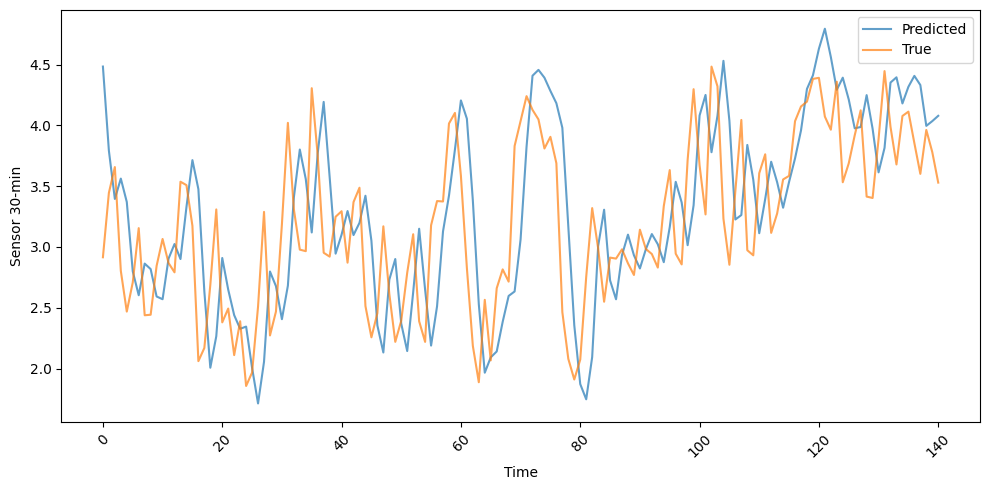

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Sensor 30-min')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15 Minutes


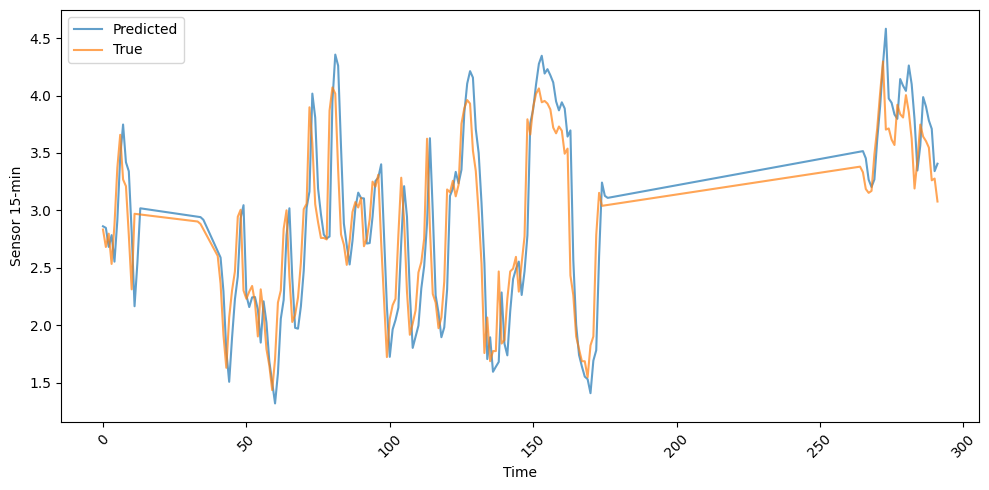

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Sensor 15-min')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

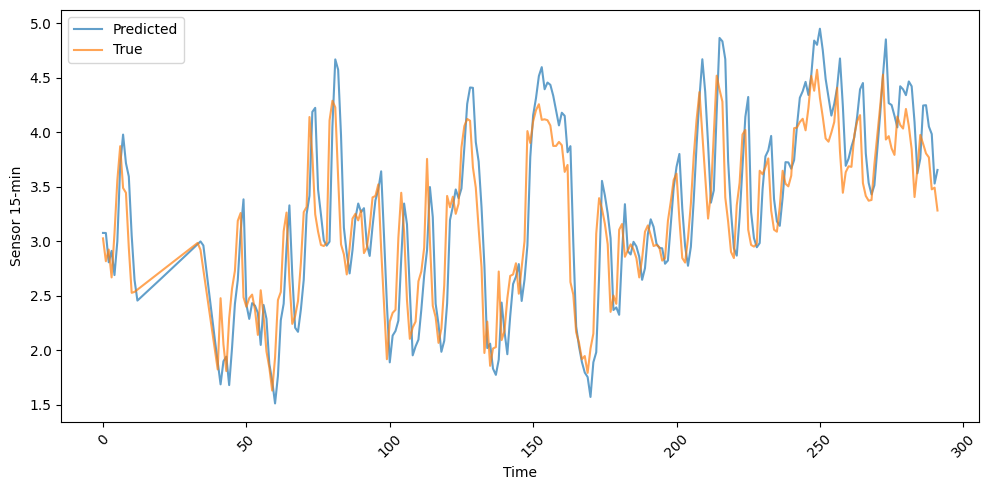

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Sensor 15-min')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

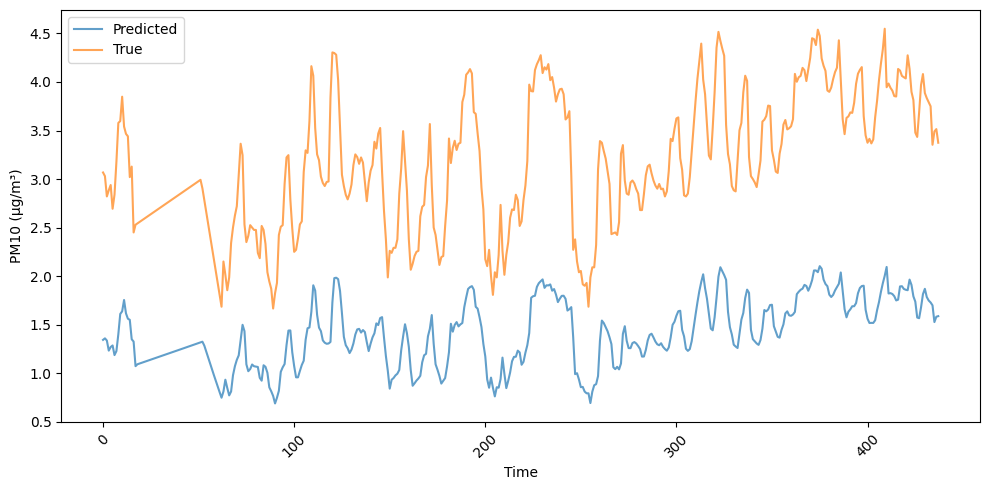

In [84]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PM_10 ##

10 Minutes (Sensor 2 + 4)

15 Minutes (Sensor 2 + 4)

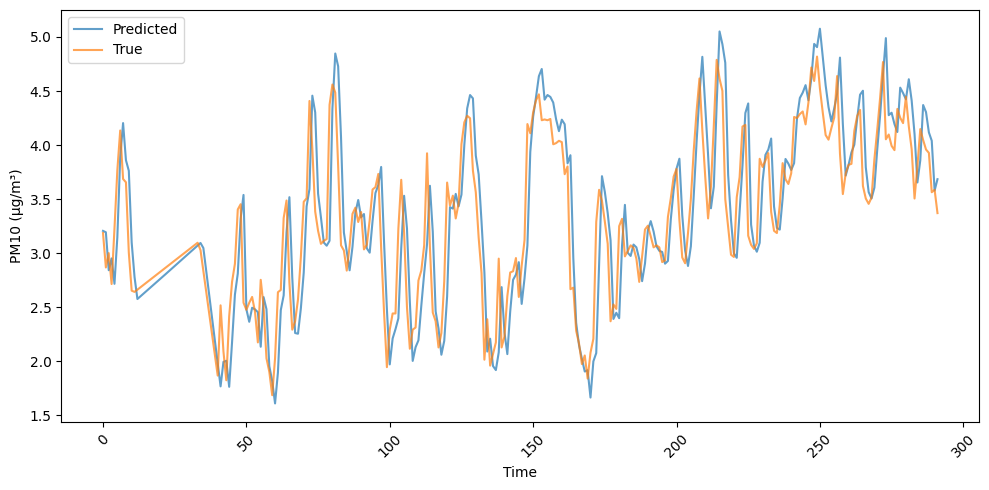

In [76]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

30 Minutes (Sensor 2 + 4)

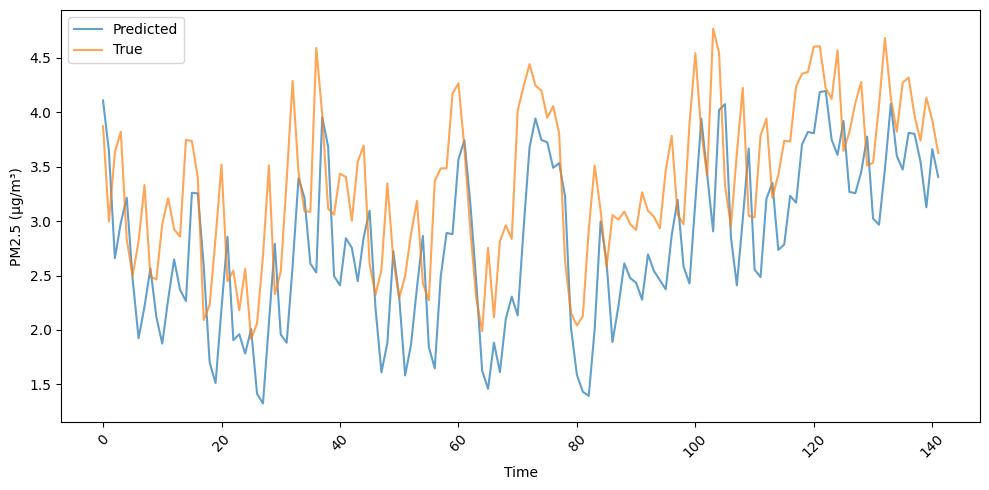

In [79]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PM_2.5 ##

10 Minutes

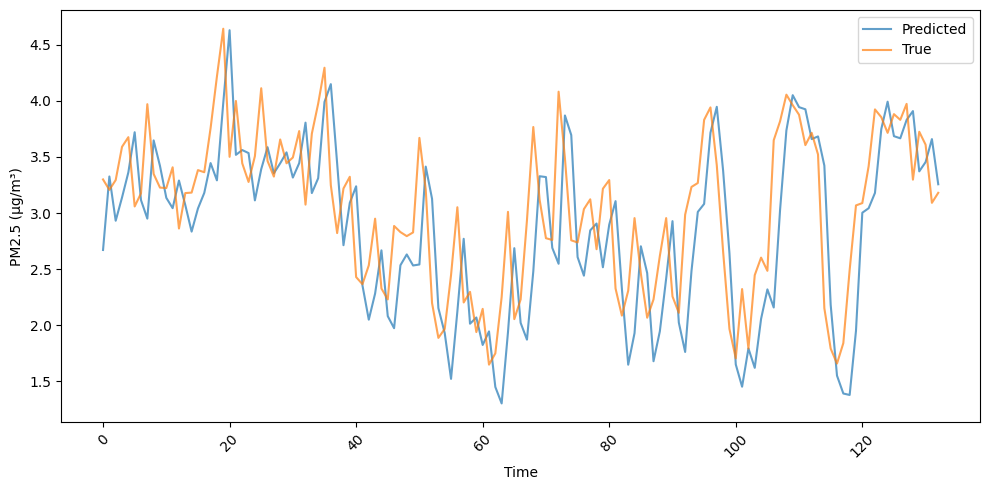

In [67]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

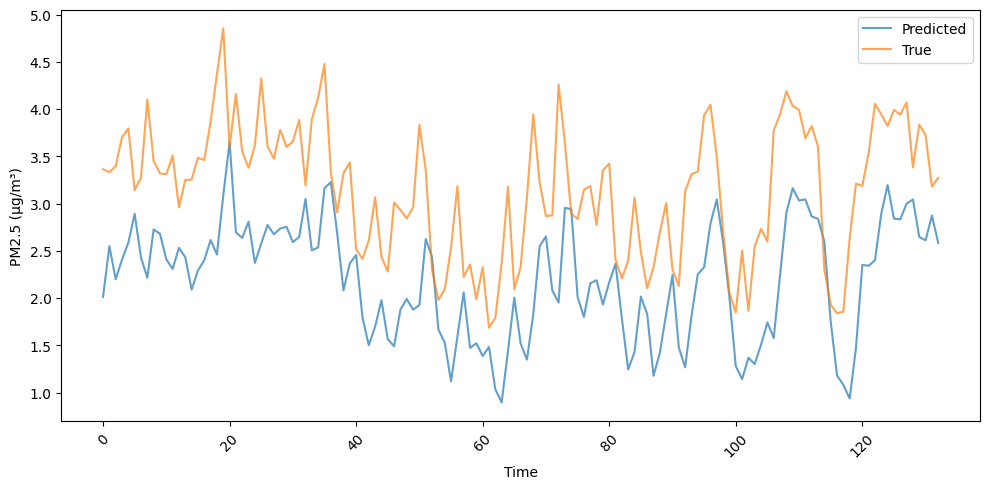

In [72]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15 Minutes

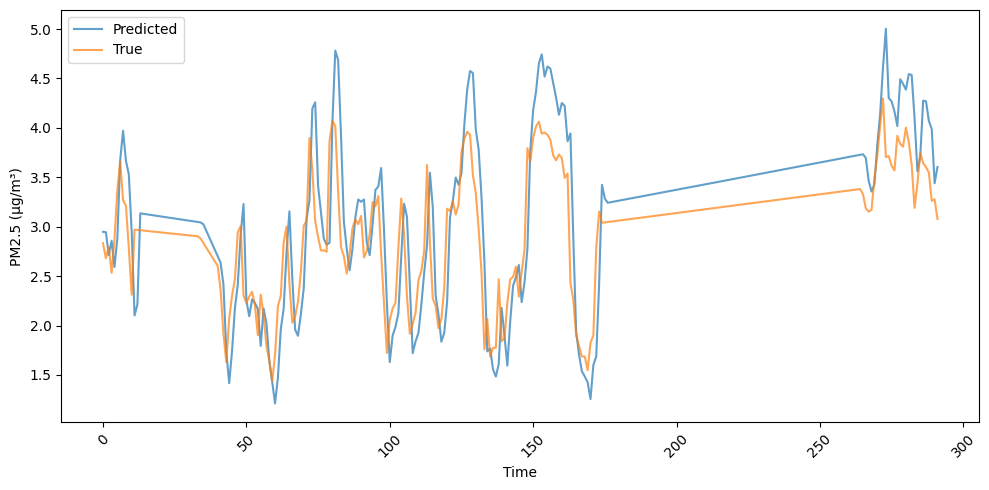

In [43]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

30 Minutes

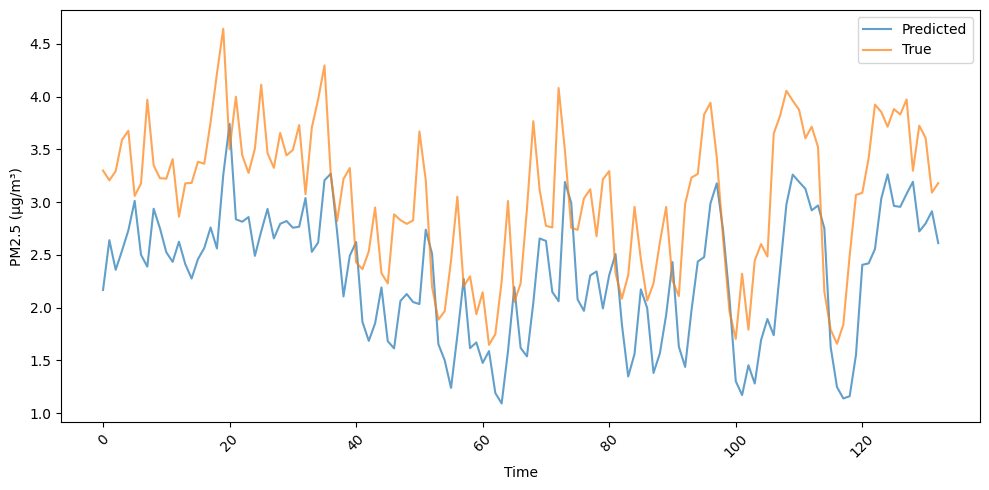

In [40]:
plt.figure(figsize=(10, 5))

plt.plot(range(len(pred_y)), pred_y[:, 0, 0], label='Predicted', alpha=0.7)
plt.plot(range(len(test_y)), test_y[:, 0, 0], label='True', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
